In [175]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

# Data Clensing and Dataframe setup

In [176]:
data2015 = pd.read_csv('2015.csv', header=0)
data2015['Year'] = 2015 

data2016 = pd.read_csv('2016.csv', header=0)
data2016['Year'] = 2016

data2017 = pd.read_csv('2017.csv', header=0)
data2017['Year'] = 2017 

data2018 = pd.read_csv('2018.csv', header=0)
data2018['Year'] = 2018

data2019 = pd.read_csv('2019.csv', header=0)
data2019['Year'] = 2019


In [177]:
data2015 = pd.DataFrame(data2015, columns = ['Country', 'Region','Happiness Rank', 'Happiness Score','Standard Error',
                                             'Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom',
                                             'Trust (Government Corruption)',
                                             'Generosity','Dystopia Residual'])
data2016 = pd.DataFrame(data2016,columns = ['Country','Region','Happiness Rank','Happiness Score','Lower Confidence Interval',
                                          'Upper Confidence Interval','Economy (GDP per Capita)','Family',
                                           'Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity'
                                          ,'Dystopia Residual',])
data2017 = pd.DataFrame(data2017,columns = ['Country','Happiness.Rank','Happiness.Score','Whisker.high',
                                          'Whisker.low','Economy..GDP.per.Capita.','Family',
                                           'Health..Life.Expectancy.','Freedom','Generosity','Trust..Government.Corruption.'
                                          ,'Dystopia.Residual', 'Region'])
data2018 = pd.DataFrame(data2018,columns = ['Overall rank','Country or region','Score','GDP per capita','Social support',
                                           'Healthy life expectancy','Freedom to make life choices','Generosity'
                                          ,'Perceptions of corruption', 'Region'])
data2019 = pd.DataFrame(data2019,columns = ['Overall rank','Country or region','Score','GDP per capita','Social support',
                                           'Healthy life expectancy','Freedom to make life choices','Generosity'
                                          ,'Perceptions of corruption','Region'])
                        
                        

In [178]:
data2015 = data2015.drop(['Standard Error'],axis=1,errors='ignore')

data2016 = data2016.drop(['Lower Confidence Interval', 'Upper Confidence Interval'],axis=1, errors='ignore')
                          
data2017 = data2017.drop(['Whisker.high','Whisker.low'],axis=1, errors='ignore')


In [179]:
data2017 = data2017.rename(columns = {'Happiness.Rank':'Happiness Rank', 'Happiness.Score' : 'Happiness Score', 
                                      'Economy..GDP.per.Capita.' : 'Economy (GDP per Capita)', 'Health..Life.Expectancy.' : 'Health (Life Expectancy)',
                                      'Trust..Government.Corruption.' : 'Trust (Government Corruption)', 'Dystopia.Residual' : 'Dystopia Residual'})
data2018 = data2018.rename(columns = {'Overall rank': 'Happiness Rank','Country or region': 'Country', 'Score': 'Happiness Score' ,
                                      'GDP per capita' : 'Economy (GDP per Capita)','Social support' : 'Family',
                                      'Healthy life expectancy' : 'Health (Life Expectancy)','Freedom to make life choices' : 'Freedom',
                                      'Perceptions of corruption' : 'Trust (Government Corruption)'})
data2019 = data2019.rename(columns = {'Overall rank':'Happiness Rank', 'Country or region' : 'Country', 'Score' : 'Happiness Score',
                                      'GDP per capita' : 'Economy (GDP per Capita)', 'Social support' : 'Family',
                                      'Healthy life expectancy' : 'Health (Life Expectancy)','Freedom to make life choices' : 'Freedom', 
                                      'Perceptions of corruption' : 'Trust (Government Corruption)'})


# Data Analysis 

# Rank Top 5 Each Year 

In [97]:
print(data2015.loc[0:4, ['Country', 'Happiness Rank']])
print(data2016.loc[0:4, ['Country', 'Happiness Rank']])
print(data2017.loc[0:4, ['Country', 'Happiness Rank']])
print(data2018.loc[0:4, ['Country', 'Happiness Rank']])
print(data2019.loc[0:4, ['Country', 'Happiness Rank']])

       Country  Happiness Rank
0  Switzerland               1
1      Iceland               2
2      Denmark               3
3       Norway               4
4       Canada               5
       Country  Happiness Rank
0      Denmark               1
1  Switzerland               2
2      Iceland               3
3       Norway               4
4      Finland               5
       Country  Happiness Rank
0       Norway               1
1      Denmark               2
2      Iceland               3
3  Switzerland               4
4      Finland               5
       Country  Happiness Rank
0      Finland               1
1       Norway               2
2      Denmark               3
3      Iceland               4
4  Switzerland               5
       Country  Happiness Rank
0      Finland               1
1      Denmark               2
2       Norway               3
3      Iceland               4
4  Netherlands               5


[Text(0, 0.5, '')]

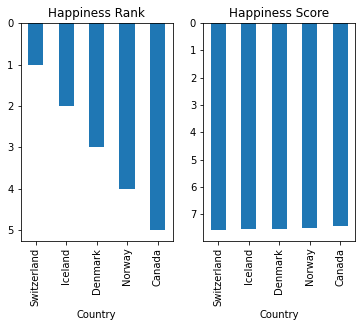

In [195]:
rank15 = data2015.loc[0:4,['Country', 'Happiness Rank', 'Happiness Score']]


# rank15.plot(x='Country',y='Happiness Rank', kind='bar')
fig = plt.figure(100)

ax1 = fig.add_subplot(121)
ax = rank15.plot(x="Country",  y="Happiness Rank", ax=ax1, kind="bar", legend = False, title = "Happiness Rank")
ax.invert_yaxis()

ax2 = fig.add_subplot(122)
ax = rank15.plot(x="Country",  y="Happiness Score", ax=ax2, kind="bar", legend = False, title = "Happiness Score")
ax.invert_yaxis()
ax.set(ylabel='')
# rank15.plot(x='Country',y='Happiness Score',kind='bar',color='yellow')

Insight: The happiest ranked countries tend to be North/NorthEastern European Countries

# Happiness Score by Region 

In [50]:
score2015 = pd.DataFrame(data2015, columns = ['Region', 'Happiness Score'])
grouped15 = score2015.groupby('Region')
mean_df15 = grouped15.mean()
mean_df15 = mean_df15.reset_index()
mean_df15

score2016 = pd.DataFrame(data2016, columns = ['Region', 'Happiness Score'])
grouped16 = score2016.groupby('Region')
mean_df16 = grouped16.mean()
mean_df16 = mean_df16.reset_index()
mean_df16

score2017 = pd.DataFrame(data2017, columns = ['Region', 'Happiness Score'])
grouped17 = score2017.groupby('Region')
mean_df17 = grouped17.mean()
mean_df17 = mean_df17.reset_index()
mean_df17

score2018 = pd.DataFrame(data2018, columns = ['Region', 'Happiness Score'])
grouped18 = score2018.groupby('Region')
mean_df18 = grouped18.mean()
mean_df18 = mean_df18.reset_index()
mean_df18

score2019 = pd.DataFrame(data2019, columns = ['Region', 'Happiness Score'])
grouped19 = score2019.groupby('Region')
mean_df19 = grouped19.mean()
mean_df19 = mean_df19.reset_index()
mean_df19

,Region,Happiness Score
0,Australia and New Zealand,7.267500
1,Central and Eastern Europe,5.561517
2,Eastern Asia,5.688833
3,Latin America and Caribbean,5.954429
4,Middle East and Northern Africa,5.261050
5,North America,7.085000
6,Southeastern Asia,5.273667
7,Southern Asia,4.526857
8,Sub-Saharan Africa,4.300050
9,Western Europe,6.898400


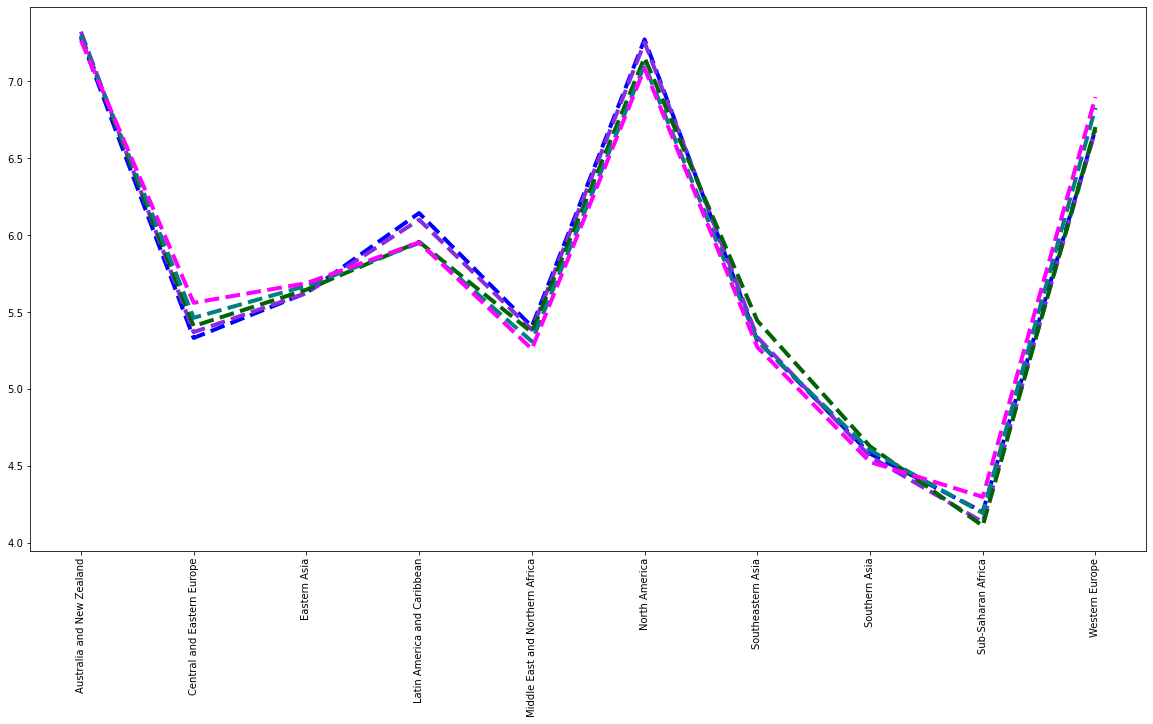

In [141]:
fig = plt.figure(figsize = (20, 10))
plt.xticks(rotation=90)

score2015 = pd.DataFrame(data2015, columns = ['Region', 'Happiness Score'])
grouped15 = score2015.groupby('Region')
mean_df15 = grouped15.mean()
mean_df15 = mean_df15.reset_index()

score2016 = pd.DataFrame(data2016, columns = ['Region', 'Happiness Score'])
grouped16 = score2016.groupby('Region')
mean_df16 = grouped16.mean()
mean_df16 = mean_df16.reset_index()


score2017 = pd.DataFrame(data2017, columns = ['Region', 'Happiness Score'])
grouped17 = score2017.groupby('Region')
mean_df17 = grouped17.mean()
mean_df17 = mean_df17.reset_index()


score2018 = pd.DataFrame(data2018, columns = ['Region', 'Happiness Score'])
grouped18 = score2018.groupby('Region')
mean_df18 = grouped18.mean()
mean_df18 = mean_df18.reset_index()


score2019 = pd.DataFrame(data2019, columns = ['Region', 'Happiness Score'])
grouped19 = score2019.groupby('Region')
mean_df19 = grouped19.mean()
mean_df19 = mean_df19.reset_index()


plt.plot( 'Region','Happiness Score', data=mean_df15, marker='', 
         color='blue', linewidth=4, linestyle='dashed', label="2015")
plt.plot( 'Region','Happiness Score', data=mean_df16, marker='', 
         color='blueviolet', linewidth=4, linestyle='dashed', label="2016")
plt.plot( 'Region','Happiness Score', data=mean_df17, marker='', 
         color='darkgreen', linewidth=4, linestyle='dashed', label="2017")
plt.plot( 'Region','Happiness Score', data=mean_df18, marker='', 
         color='teal', linewidth=4, linestyle='dashed', label="2018")
plt.plot( 'Region','Happiness Score', data=mean_df19, marker='', 
         color='magenta', linewidth=4, linestyle='dashed', label="2019")



In [ ]:
Insight: On average, the Australian/New Zealand, North American regions and Europe score the score the highest. 
The Australian/New Zealand and North American Regions however are only consisted of two countries while Europe has many.

# Top 5 Bottom 5 Economy GDP 

Text(0, 0.5, 'GDP Score')

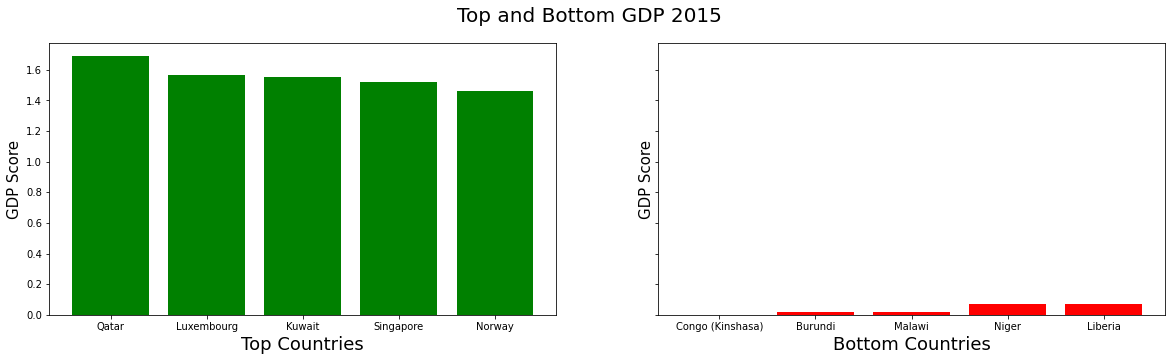

In [159]:
data2015_top = data2015.nlargest(5, 'Economy (GDP per Capita)')
data2015_bot = data2015.nsmallest(5,'Economy (GDP per Capita)')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5),sharey=True)
axes[0].bar(data2015_top['Country'],data2015_top['Economy (GDP per Capita)'],color='green')
axes[1].bar(data2015_bot['Country'],data2015_bot['Economy (GDP per Capita)'],color='red')
plt.suptitle('Top and Bottom GDP 2015', fontsize=20)

axes[0].set_xlabel('Top Countries', fontsize=18)
axes[0].set_ylabel("GDP Score", fontsize=15)
axes[1].set_xlabel('Bottom Countries', fontsize=18)
axes[1].set_ylabel("GDP Score", fontsize=15)


Text(0, 0.5, 'GDP Score')

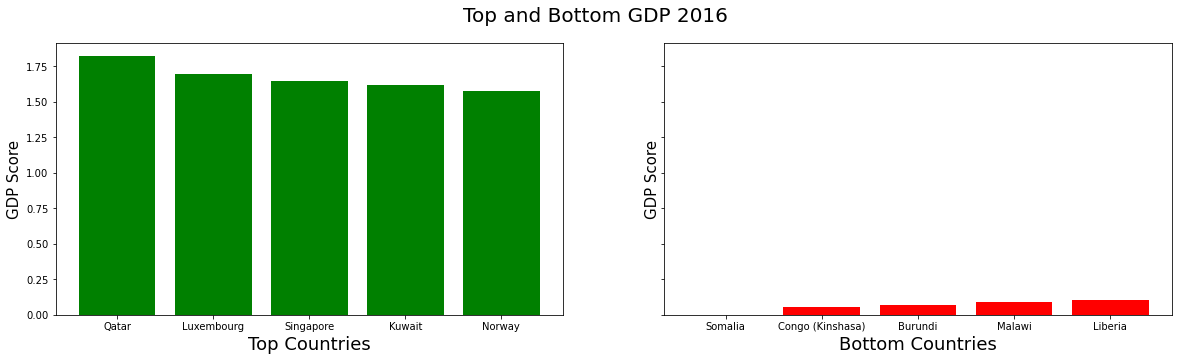

In [158]:
data2016_top = data2016.nlargest(5, 'Economy (GDP per Capita)')
data2016_bot = data2016.nsmallest(5,'Economy (GDP per Capita)')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5),sharey=True)
axes[0].bar(data2016_top['Country'],data2016_top['Economy (GDP per Capita)'],color='green')
axes[1].bar(data2016_bot['Country'],data2016_bot['Economy (GDP per Capita)'],color='red')
plt.suptitle('Top and Bottom GDP 2016', fontsize=20)

axes[0].set_xlabel('Top Countries', fontsize=18)
axes[0].set_ylabel("GDP Score", fontsize=15)
axes[1].set_xlabel('Bottom Countries', fontsize=18)
axes[1].set_ylabel("GDP Score", fontsize=15)


Text(0, 0.5, 'GDP Score')

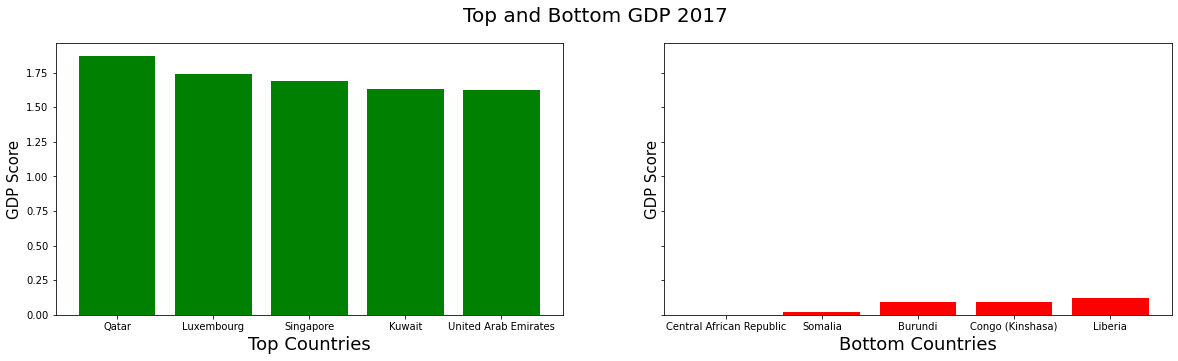

In [157]:
data2017_top = data2017.nlargest(5, 'Economy (GDP per Capita)')
data2017_bot = data2017.nsmallest(5,'Economy (GDP per Capita)')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5),sharey=True)
axes[0].bar(data2017_top['Country'],data2017_top['Economy (GDP per Capita)'],color='green')
axes[1].bar(data2017_bot['Country'],data2017_bot['Economy (GDP per Capita)'],color='red')
plt.suptitle('Top and Bottom GDP 2017', fontsize=20)

axes[0].set_xlabel('Top Countries', fontsize=18)
axes[0].set_ylabel("GDP Score", fontsize=15)
axes[1].set_xlabel('Bottom Countries', fontsize=18)
axes[1].set_ylabel("GDP Score", fontsize=15)


Text(0, 0.5, 'GDP Score')

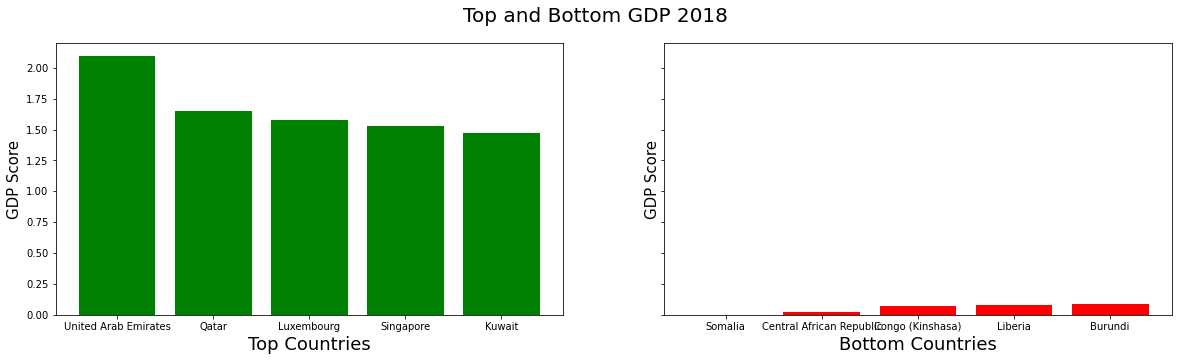

In [156]:
data2018_top = data2018.nlargest(5, 'Economy (GDP per Capita)')
data2018_bot = data2018.nsmallest(5,'Economy (GDP per Capita)')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5),sharey=True)
axes[0].bar(data2018_top['Country'],data2018_top['Economy (GDP per Capita)'],color='green')
axes[1].bar(data2018_bot['Country'],data2018_bot['Economy (GDP per Capita)'],color='red')
plt.suptitle('Top and Bottom GDP 2018', fontsize=20)

axes[0].set_xlabel('Top Countries', fontsize=18)
axes[0].set_ylabel("GDP Score", fontsize=15)
axes[1].set_xlabel('Bottom Countries', fontsize=18)
axes[1].set_ylabel("GDP Score", fontsize=15)


Text(0, 0.5, 'GDP Score')

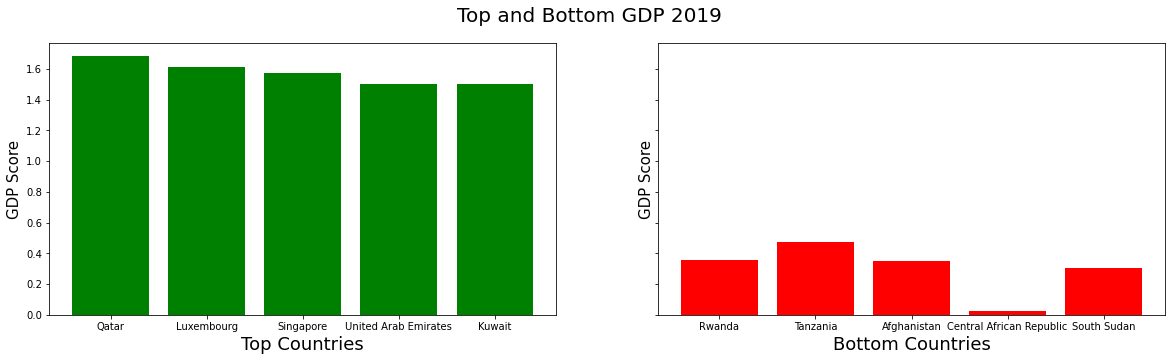

In [154]:
data2019_top = data2019.nlargest(5, 'Economy (GDP per Capita)')
data2019_bot = data2019[-5:]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5),sharey=True)
axes[0].bar(data2019_top['Country'],data2019_top['Economy (GDP per Capita)'],color='green')
axes[1].bar(data2019_bot['Country'],data2019_bot['Economy (GDP per Capita)'],color='red')
plt.suptitle('Top and Bottom GDP 2019', fontsize=20)

axes[0].set_xlabel('Top Countries', fontsize=18)
axes[0].set_ylabel("GDP Score", fontsize=15)
axes[1].set_xlabel('Bottom Countries', fontsize=18)
axes[1].set_ylabel("GDP Score", fontsize=15)


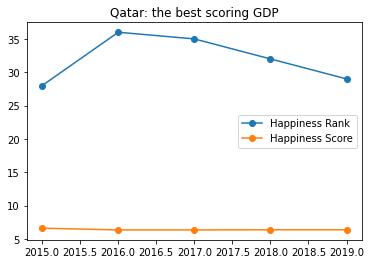

In [174]:
q2015 = data2015.loc[data2015['Country']== 'Qatar']
q2016 = data2016.loc[data2016['Country']== 'Qatar']
q2017 = data2017.loc[data2017['Country']== 'Qatar']
q2018 = data2018.loc[data2018['Country']== 'Qatar']
q2019 = data2019.loc[data2019['Country']== 'Qatar']

q2015 = pd.DataFrame(q2015, columns = ['Country', 'Happiness Rank', 'Happiness Score',
                                             'Economy (GDP per Capita)'])
q2016 = pd.DataFrame(q2016, columns = ['Country', 'Happiness Rank', 'Happiness Score',
                                             'Economy (GDP per Capita)'])
q2017 = pd.DataFrame(q2017, columns = ['Country', 'Happiness Rank', 'Happiness Score',
                                             'Economy (GDP per Capita)'])
q2018 = pd.DataFrame(q2018, columns = ['Country', 'Happiness Rank', 'Happiness Score',
                                             'Economy (GDP per Capita)'])
q2019 = pd.DataFrame(q2019, columns = ['Country', 'Happiness Rank', 'Happiness Score',
                                             'Economy (GDP per Capita)'])

x1 = [2015,2016,2017,2018,2019] 
y1 = [28,36,35,32,29] 
plt.plot(x1, y1, label = "Happiness Rank", marker="o")

x2 = [2015,2016,2017,2018,2019] 
y2 = [6.61,6.35,6.35,6.37,6.37]   
plt.plot(x2, y2, label = "Happiness Score", marker="o") 

plt.title('Qatar: the best scoring GDP')
plt.legend()


In [ ]:
Insight: The top countries for GDP are Middle eastern and Asian countries even 
though it's the element most correlated to happiness score. Money just might not buy happiness

# Correlation between Elements and Happiness Score

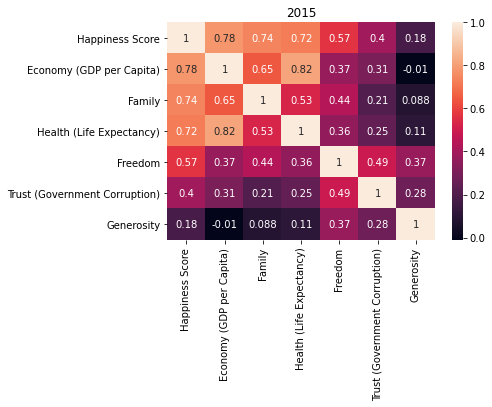

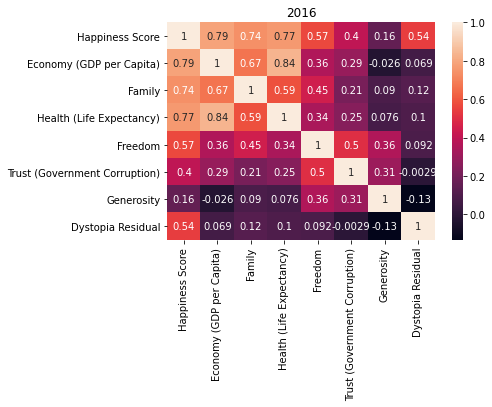

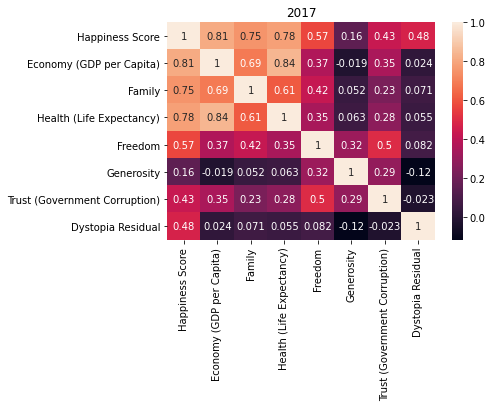

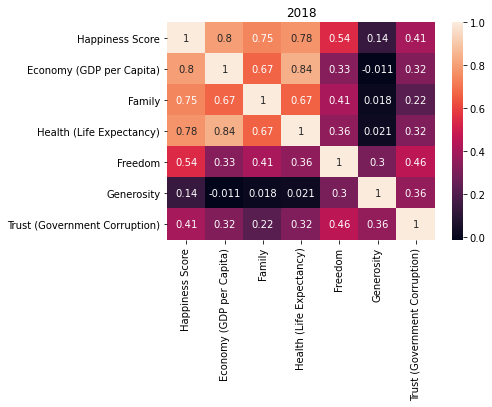

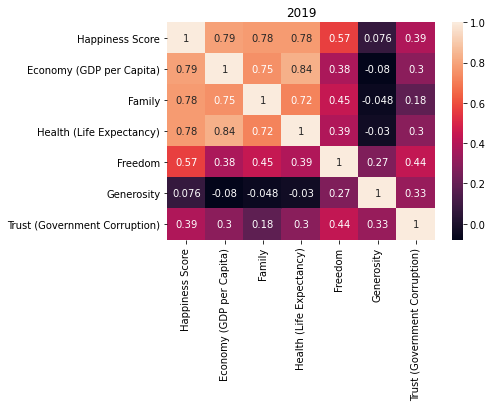

In [160]:
ele2015 = data2015.drop(['Country', 'Region','Happiness Rank','Dystopia Residual'],axis=1)
ele2016 = data2016.drop(['Country', 'Region','Happiness Rank'],axis=1)
ele2017 = data2017.drop(['Country','Happiness Rank'],axis=1)
ele2018 = data2018.drop(['Country', 'Happiness Rank'],axis=1)
ele2019 = data2019.drop(['Country', 'Happiness Rank'],axis=1)

sns.heatmap(ele2015.corr(),annot=True)
plt.title("2015")
plt.show()

sns.heatmap(ele2016.corr(),annot=True)
plt.title("2016")
plt.show()

sns.heatmap(ele2017.corr(),annot=True)
plt.title("2017")
plt.show()

sns.heatmap(ele2018.corr(),annot=True)
plt.title("2018")
plt.show()

sns.heatmap(ele2019.corr(),annot=True)
plt.title("2019")
plt.show()

In [ ]:
Insight: GDP, Family and then lifestyle are the most correlated to happiness score

# Best Countries by Element 2019 

In [207]:
top2019gdp= data2019.sort_values(by=['Economy (GDP per Capita)'],ascending=False)
a = top2019gdp['Country'].head(3)
a = pd.DataFrame(a)
a['Category'] = 'Economy (GDP per Capita)'

top2019fam= data2019.sort_values(by=['Family'],ascending=False)
b = top2019fam['Country'].head(3)
b = pd.DataFrame(b)
b['Category'] = 'Family'

top2019health= data2019.sort_values(by=['Health (Life Expectancy)'],ascending=False)
c = top2019health['Country'].head(3)
c = pd.DataFrame(c)
c['Category'] = 'Health (Life Expectancy)'

top2019free= data2019.sort_values(by=['Freedom'],ascending=False)
d = top2019free['Country'].head(3)
d = pd.DataFrame(d)
d['Category'] = 'Freedom'

top2019gen= data2019.sort_values(by=['Generosity'],ascending=False)
e = top2019gen['Country'].head(3)
e = pd.DataFrame(e)
e['Category'] = 'Generosity'


top2019gov= data2019.sort_values(by=['Trust (Government Corruption)'],ascending=False)
f = top2019gov['Country'].head(3)
f = pd.DataFrame(f)
f['Category'] = 'Trust (Government Corruption)'



final = pd.concat([a,b,c,d,e,f])

final

,Country,Category
28,Qatar,Economy (GDP per Capita)
13,Luxembourg,Economy (GDP per Capita)
33,Singapore,Economy (GDP per Capita)
3,Iceland,Family
0,Finland,Family
2,Norway,Family
33,Singapore,Health (Life Expectancy)
75,Hong Kong,Health (Life Expectancy)
57,Japan,Health (Life Expectancy)
40,Uzbekistan,Freedom


In [ ]:
Insight: In 2019, several Asian countries have the higher ranked element scores. A country doesn't necessarily 
have to be ranked high in order to have high scoring elements 
    

# Has Trust in goverment gone up or down last 5 years?

In [121]:
data2015_mean = data2015['Trust (Government Corruption)'].mean()
print(data2015_mean)

data2016_mean = data2016['Trust (Government Corruption)'].mean()
print(data2016_mean)

data2017_mean = data2017['Trust (Government Corruption)'].mean()
print(data2017_mean)

data2018_mean = data2018['Trust (Government Corruption)'].mean()
print(data2018_mean)

data2019_mean = data2019['Trust (Government Corruption)'].mean()
print(data2019_mean)

0.14342183544303794
0.1376237579617835
0.12312022065142951
0.11200000000000002
0.11060256410256411


In [ ]:
Insight: Trust in governemnt has gone down by about .03 in the past 5 years

# Are people who live longer(life expectancy) happier? 

In [39]:
health15 = data2015[['Country','Happiness Rank','Health (Life Expectancy)']].sort_values(by= ['Health (Life Expectancy)'],ascending = False)
h15 = health15[0:4]

health16 = data2016[['Country','Happiness Rank','Health (Life Expectancy)']].sort_values(by= ['Health (Life Expectancy)'],ascending = False)
h16 = health16[0:4]

health17 = data2017[['Country','Happiness Rank','Health (Life Expectancy)']].sort_values(by= ['Health (Life Expectancy)'],ascending = False)
h17 = health17[0:4]

health18 = data2018[['Country','Happiness Rank','Health (Life Expectancy)']].sort_values(by= ['Health (Life Expectancy)'],ascending = False)
h18 = health18[0:4]

health19 = data2019[['Country','Happiness Rank','Health (Life Expectancy)']].sort_values(by= ['Health (Life Expectancy)'],ascending = False)
h19 = health19[0:4]
                                                                            
final = pd.concat([h15,h16,h17,h18,h19])
final

,Country,Happiness Rank,Health (Life Expectancy)
23,Singapore,24,1.025250
71,Hong Kong,72,1.013280
45,Japan,46,0.991110
46,South Korea,47,0.965380
74,Hong Kong,75,0.952770
21,Singapore,22,0.947190
52,Japan,53,0.914910
57,South Korea,57,0.886450
25,Singapore,26,0.949492
70,"Hong Kong S.A.R., China",71,0.943062


In [ ]:
Insight: Health(life expectancy) contibutes to the overall happiness score but isn't the biggest factor
as many of the coutries are not ranked super high
    

# Do the worst Ranked Countries have similarities 

In [38]:
rows = data2015.iloc[-5:]
rows16 = data2016.iloc[-5:]
rows17 = data2017.iloc[-5:]
rows18 = data2018.iloc[-5:]
rows19 = data2019.iloc[-5:]
final = pd.concat([rows,rows16,rows17,rows18,rows19])
final

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.222080,0.773700,0.428640,0.592010,0.551910,0.226280,0.670420
154,Benin,Sub-Saharan Africa,155,3.340,0.286650,0.353860,0.319100,0.484500,0.080100,0.182600,1.633280
155,Syria,Middle East and Northern Africa,156,3.006,0.663200,0.474890,0.721930,0.156840,0.189060,0.471790,0.328580
156,Burundi,Sub-Saharan Africa,157,2.905,0.015300,0.415870,0.223960,0.118500,0.100620,0.197270,1.833020
157,Togo,Sub-Saharan Africa,158,2.839,0.208680,0.139950,0.284430,0.364530,0.107310,0.166810,1.567260
152,Benin,Sub-Saharan Africa,153,3.484,0.394990,0.104190,0.210280,0.397470,0.066810,0.201800,2.108120
153,Afghanistan,Southern Asia,154,3.360,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680,2.145580
154,Togo,Sub-Saharan Africa,155,3.303,0.281230,0.000000,0.248110,0.346780,0.115870,0.175170,2.135400
155,Syria,Middle East and Northern Africa,156,3.069,0.747190,0.148660,0.629940,0.069120,0.172330,0.483970,0.817890
156,Burundi,Sub-Saharan Africa,157,2.905,0.068310,0.234420,0.157470,0.043200,0.094190,0.202900,2.104040


In [ ]:
Insight: Yes, All are from Africa and Middle East for all 5 years. Some of the same countries show up multiple years

# How is the United States Doing?

In [37]:
us2015 = data2015.loc[data2015['Country']== 'United States']
us2016 = data2016.loc[data2016['Country']== 'United States']
us2017 = data2017.loc[data2017['Country']== 'United States']
us2018 = data2018.loc[data2018['Country']== 'United States']
us2019 = data2019.loc[data2019['Country']== 'United States']
final = pd.concat([us2015,us2016,us2017,us2018,us2019])
final

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
14,United States,North America,15,7.119,1.394510,1.247110,0.861790,0.546040,0.158900,0.401050,2.510110
12,United States,North America,13,7.104,1.507960,1.047820,0.779000,0.481630,0.148680,0.410770,2.727820
13,United States,North America,14,6.993,1.546259,1.419921,0.774287,0.505741,0.135639,0.392579,2.218113
17,United States,North America,18,6.886,1.398000,1.471000,0.819000,0.547000,0.133000,0.291000,NaN
18,United States,North America,19,6.892,1.433000,1.457000,0.874000,0.454000,0.128000,0.280000,NaN


In [ ]:
Insight: As a country the trend is that the U.S has gone down in the past 5 years. Compared to other countries, 
the U.S is good but not the best. The trust in the goverment and generosity has been on a steady decrease. 
The other elements are fairly consistant in the past 5 years.